# AML Coursework assessment

In [1]:
# install modules
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import set_printoptions
from scipy.stats import randint, uniform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# load dataset
data = pd.read_csv('./data/obesity dataset.csv')

# Obesity Dataset
## 1.1 Data Overview
## 1.2 Data Proprocessing

In [4]:
# display shape and head of data
print("Shape of data:", data.shape)
print("Head of data:")
data.head(10)

Shape of data: (2111, 17)
Head of data:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
# check missing values
missing_values = data.isnull().sum()
print(missing_values)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64


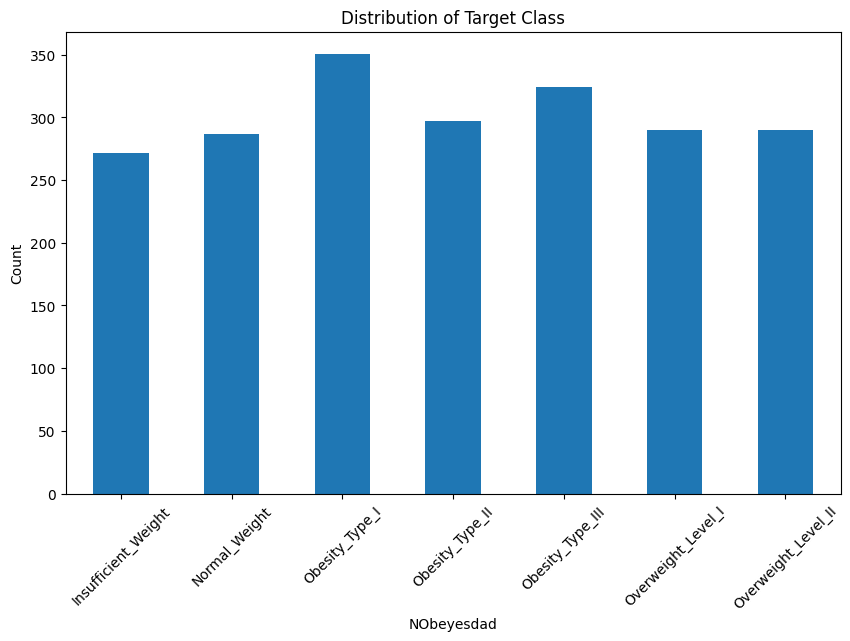

In [6]:
# check target class distribution
target_class_distribution = data.groupby('NObeyesdad').size()
print(target_class_distribution)

# visualise
plt.figure(figsize=(10, 6))
target_class_distribution.plot(kind='bar')
plt.title('Distribution of Target Class')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

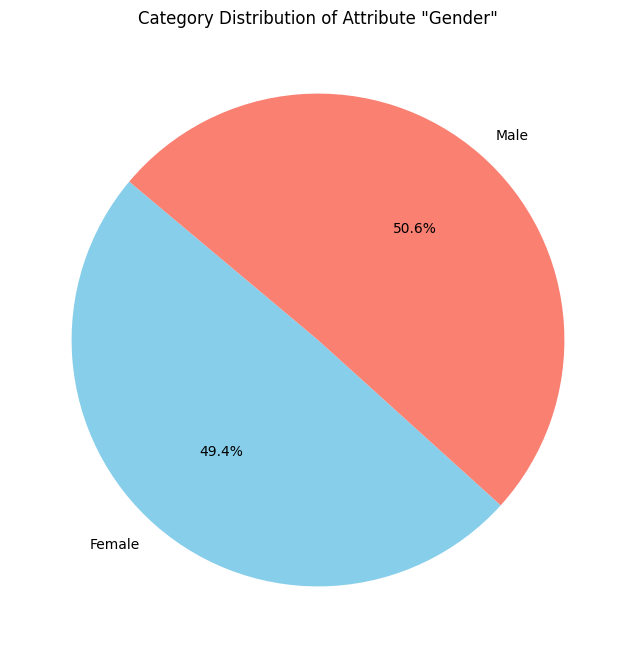

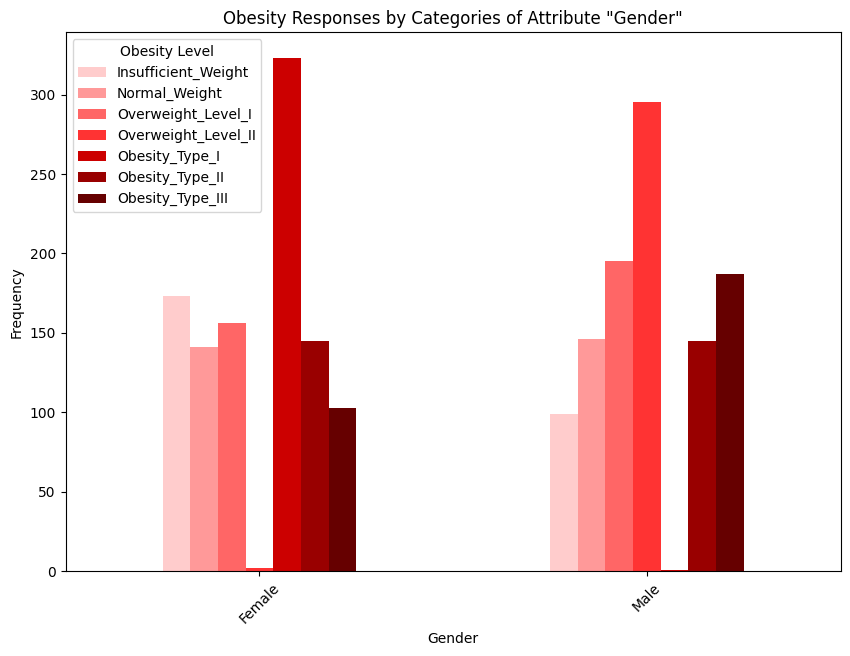

In [7]:
# category distribution of attribute "Gender" 
Gender_distribution = data.groupby('Gender').size()

# visualise
plt.figure(figsize=(8, 8))
Gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Category Distribution of Attribute "Gender"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "Gender" 
obesity_by_Gender = data.groupby(['Gender', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_Gender.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "Gender"')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

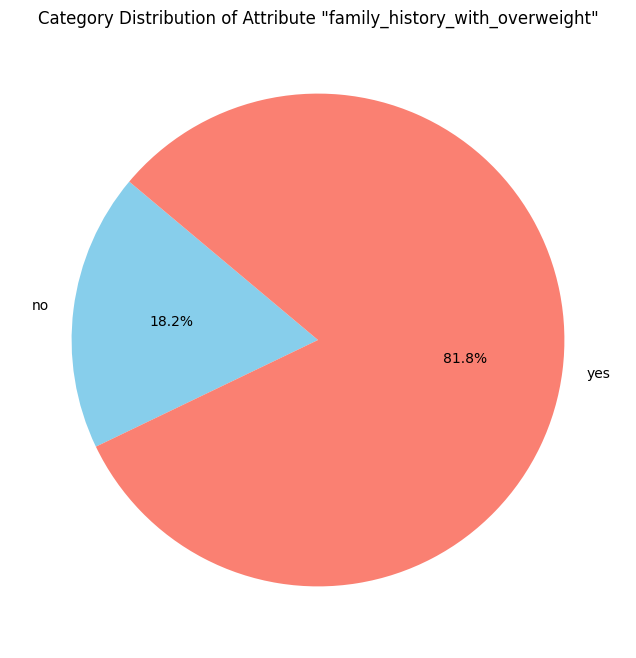

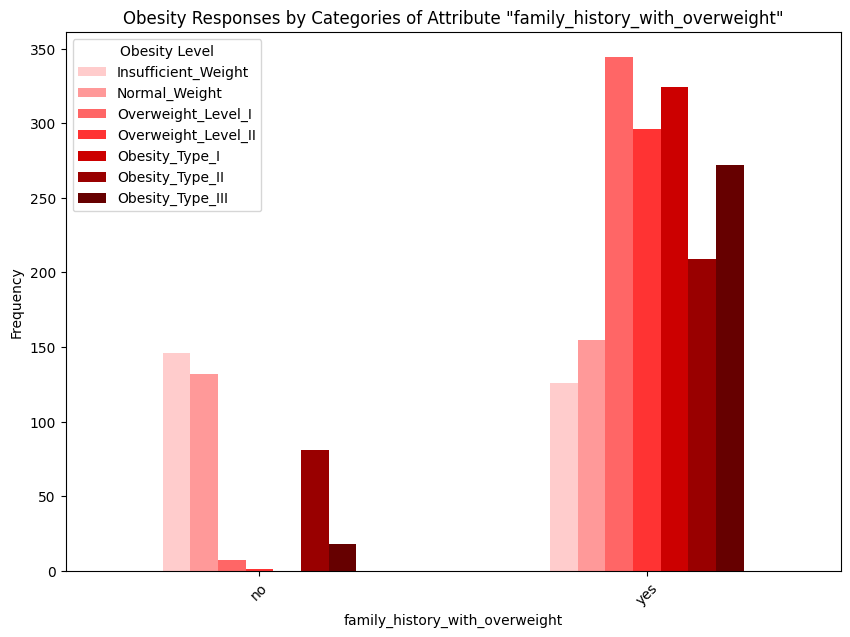

In [8]:
# category distribution of attribute "family_history_with_overweight" 
family_history_with_overweight_distribution = data.groupby('family_history_with_overweight').size()

# visualise
plt.figure(figsize=(8, 8))
family_history_with_overweight_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Category Distribution of Attribute "family_history_with_overweight"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "family_history_with_overweight" 
obesity_by_family_history_with_overweight = data.groupby(['family_history_with_overweight', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_family_history_with_overweight.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "family_history_with_overweight"')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

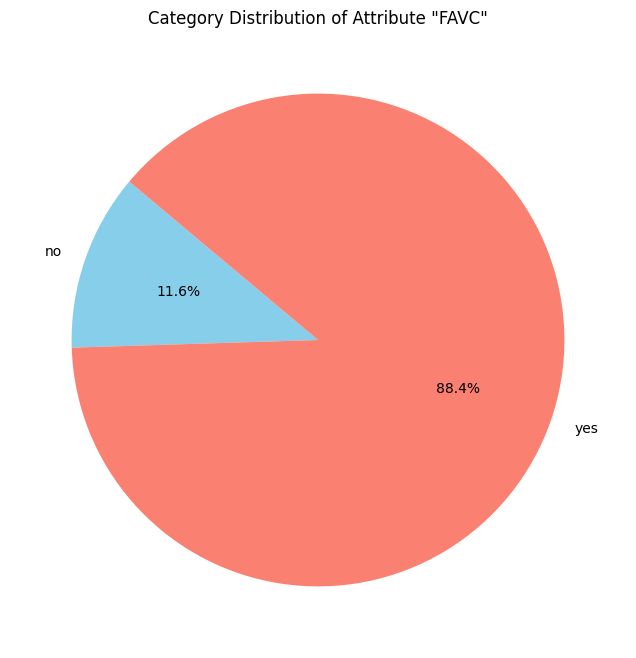

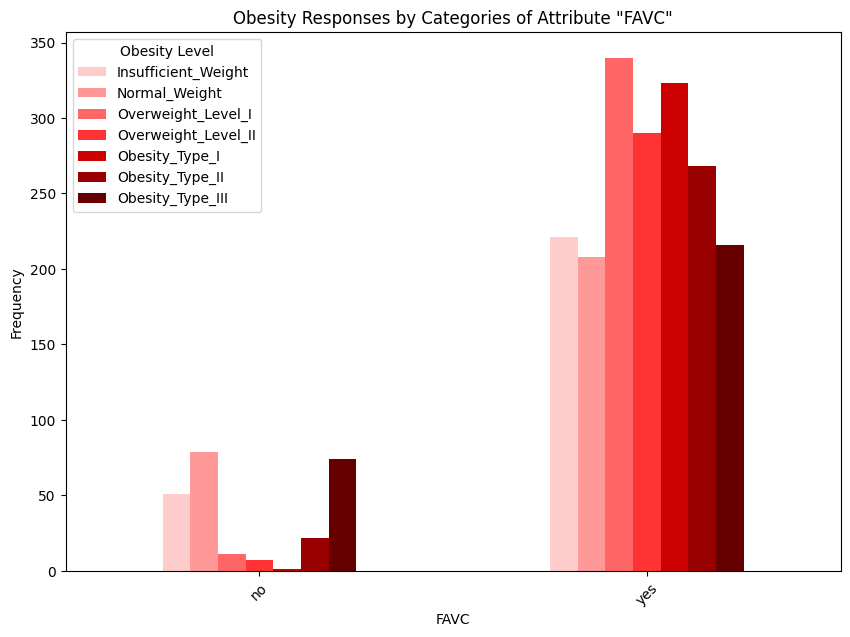

In [9]:
# category distribution of attribute "FAVC" 
FAVC_distribution = data.groupby('FAVC').size()

# visualise
plt.figure(figsize=(8, 8))
FAVC_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Category Distribution of Attribute "FAVC"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "FAVC" 
obesity_by_FAVC = data.groupby(['FAVC', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_FAVC.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "FAVC"')
plt.xlabel('FAVC')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

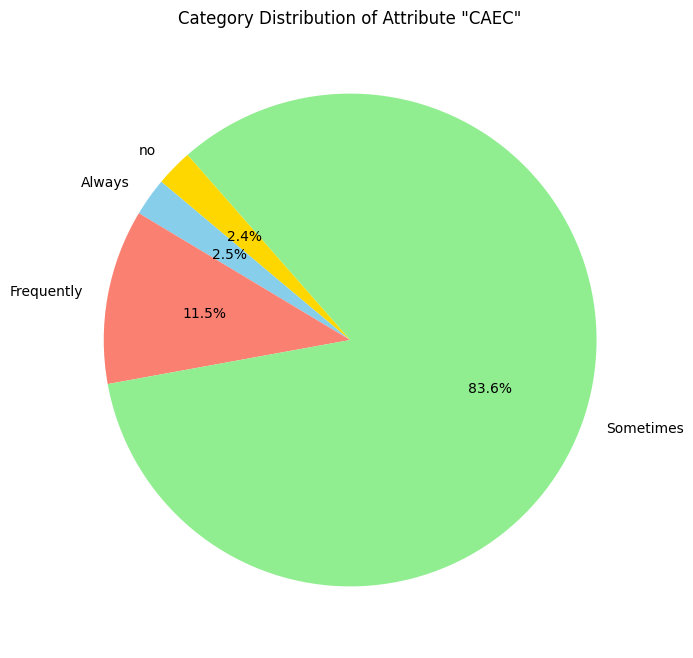

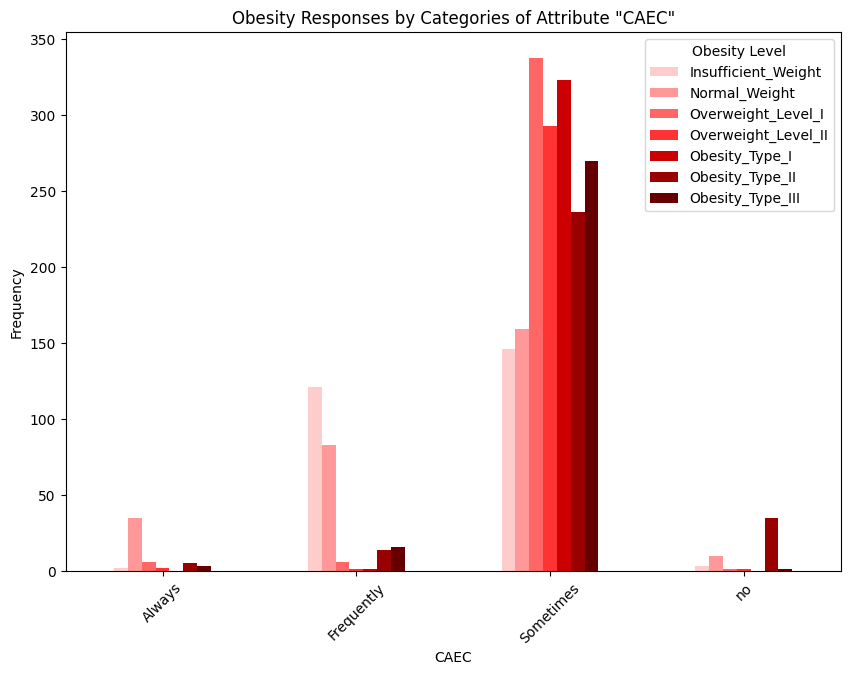

In [10]:
# category distribution of attribute "CAEC" 
CAEC_distribution = data.groupby('CAEC').size()

# visualise
plt.figure(figsize=(8, 8))
CAEC_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Category Distribution of Attribute "CAEC"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "CAEC" 
obesity_by_CAEC = data.groupby(['CAEC', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_CAEC.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "CAEC"')
plt.xlabel('CAEC')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

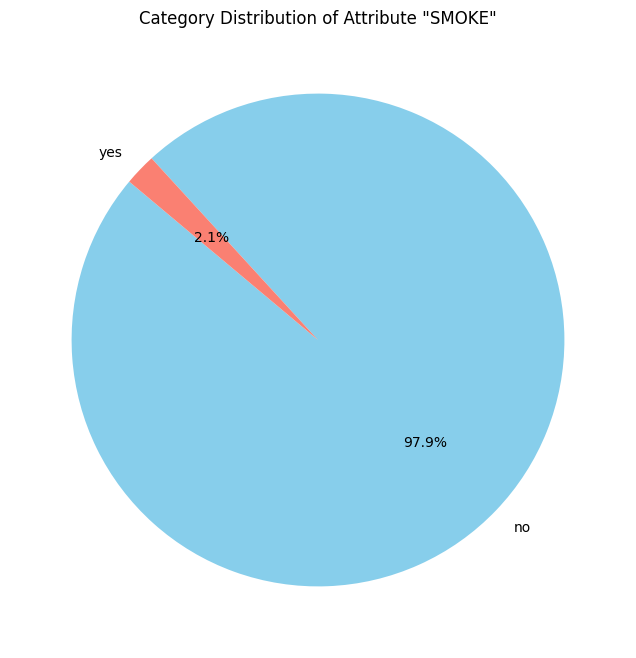

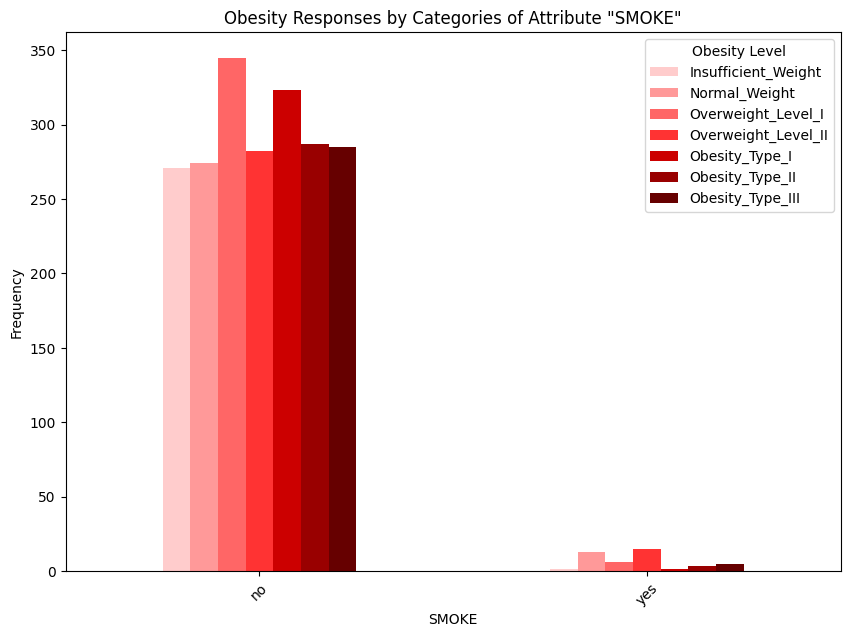

In [11]:
# category distribution of attribute "SMOKE" 
SMOKE_distribution = data.groupby('SMOKE').size()

# visualise
plt.figure(figsize=(8, 8))
SMOKE_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'darkblue'])
plt.title('Category Distribution of Attribute "SMOKE"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "SMOKE" 
obesity_by_SMOKE = data.groupby(['SMOKE', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_SMOKE.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "SMOKE"')
plt.xlabel('SMOKE')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

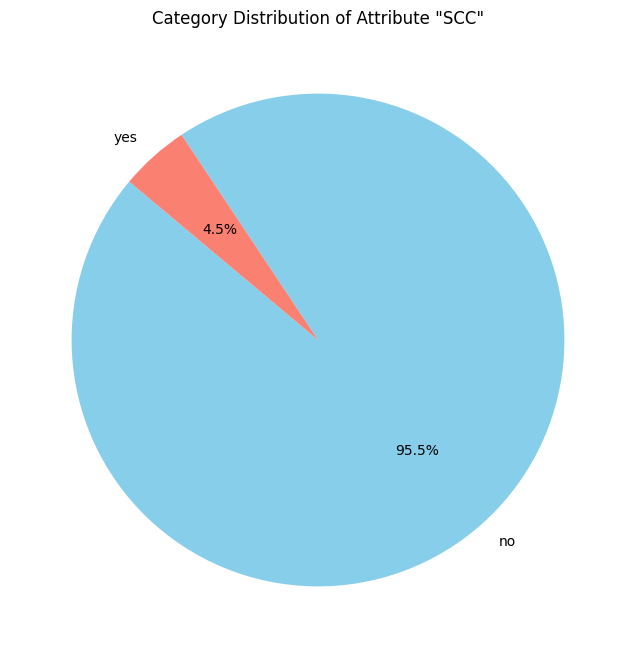

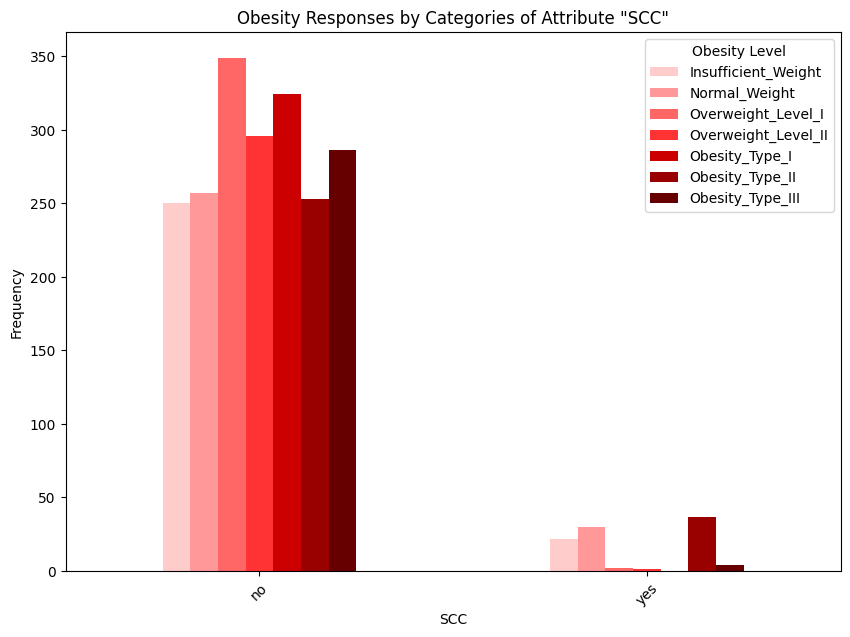

In [12]:
# category distribution of attribute "SCC" 
SCC_distribution = data.groupby('SCC').size()

# visualise
plt.figure(figsize=(8, 8))
SCC_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'darkblue'])
plt.title('Category Distribution of Attribute "SCC"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "SCC" 
obesity_by_SCC = data.groupby(['SCC', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_SCC.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "SCC"')
plt.xlabel('SCC')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

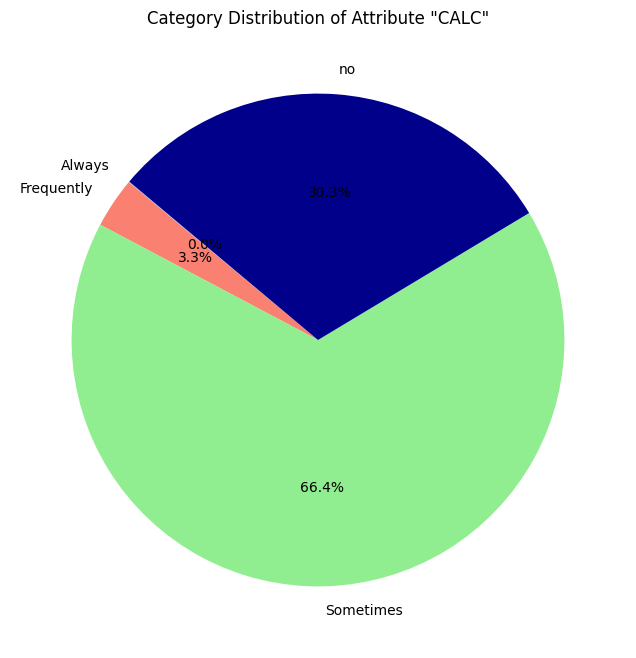

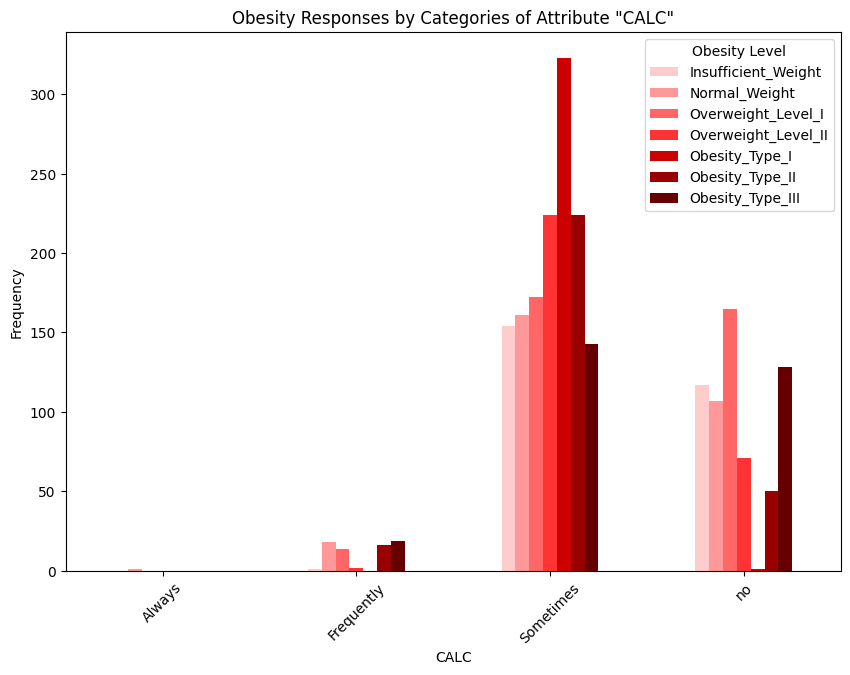

In [13]:
# category distribution of attribute "CALC" 
CALC_distribution = data.groupby('CALC').size()

# visualise
plt.figure(figsize=(8, 8))
CALC_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'darkblue'])
plt.title('Category Distribution of Attribute "CALC"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "CALC" 
obesity_by_CALC = data.groupby(['CALC', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_CALC.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "CALC"')
plt.xlabel('CALC')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

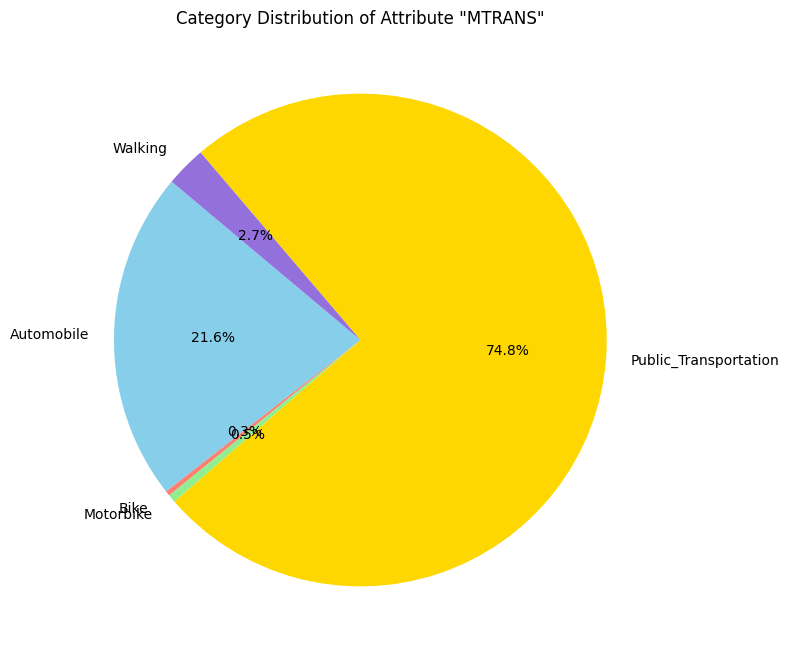

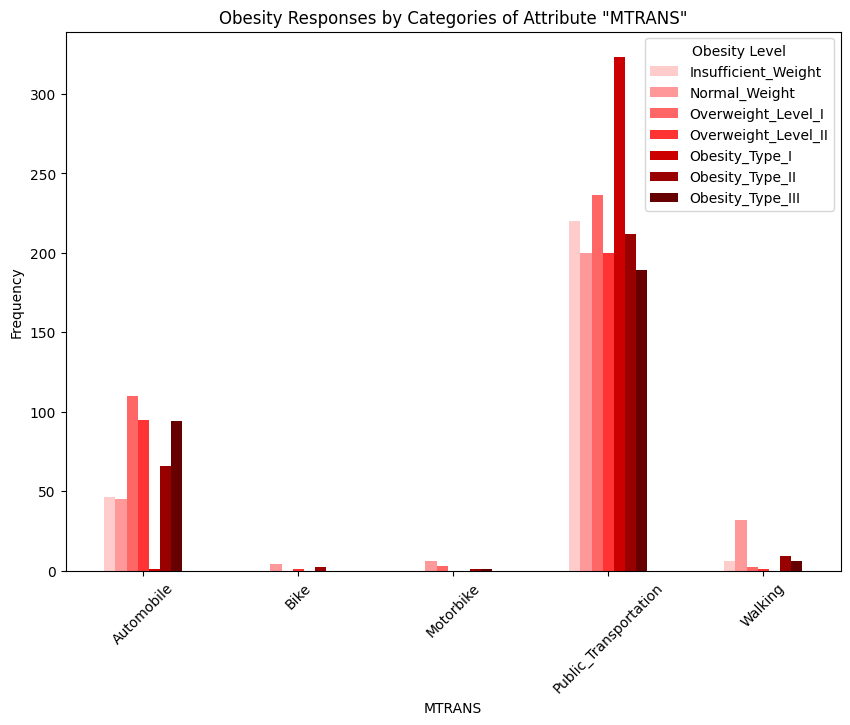

In [14]:
# category distribution of attribute "MTRANS" 
MTRANS_distribution = data.groupby('MTRANS').size()

# visualise
plt.figure(figsize=(8, 8))
MTRANS_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'gold', 'mediumpurple'])
plt.title('Category Distribution of Attribute "MTRANS"')
plt.ylabel('')
plt.show()

# obesity responses by categories of attribute "MTRANS" 
obesity_by_MTRANS = data.groupby(['MTRANS', 'NObeyesdad']).size().unstack()
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']
obesity_by_MTRANS.plot(kind='bar', figsize=(10, 7), color=colors)
plt.title('Obesity Responses by Categories of Attribute "MTRANS"')
plt.xlabel('MTRANS')
plt.ylabel('Frequency')
plt.legend(title='Obesity Level', labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.xticks(rotation=45)
plt.show()

In [15]:
# display statistical summary of numeric attributes 
numeric_attributes = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
data[numeric_attributes].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


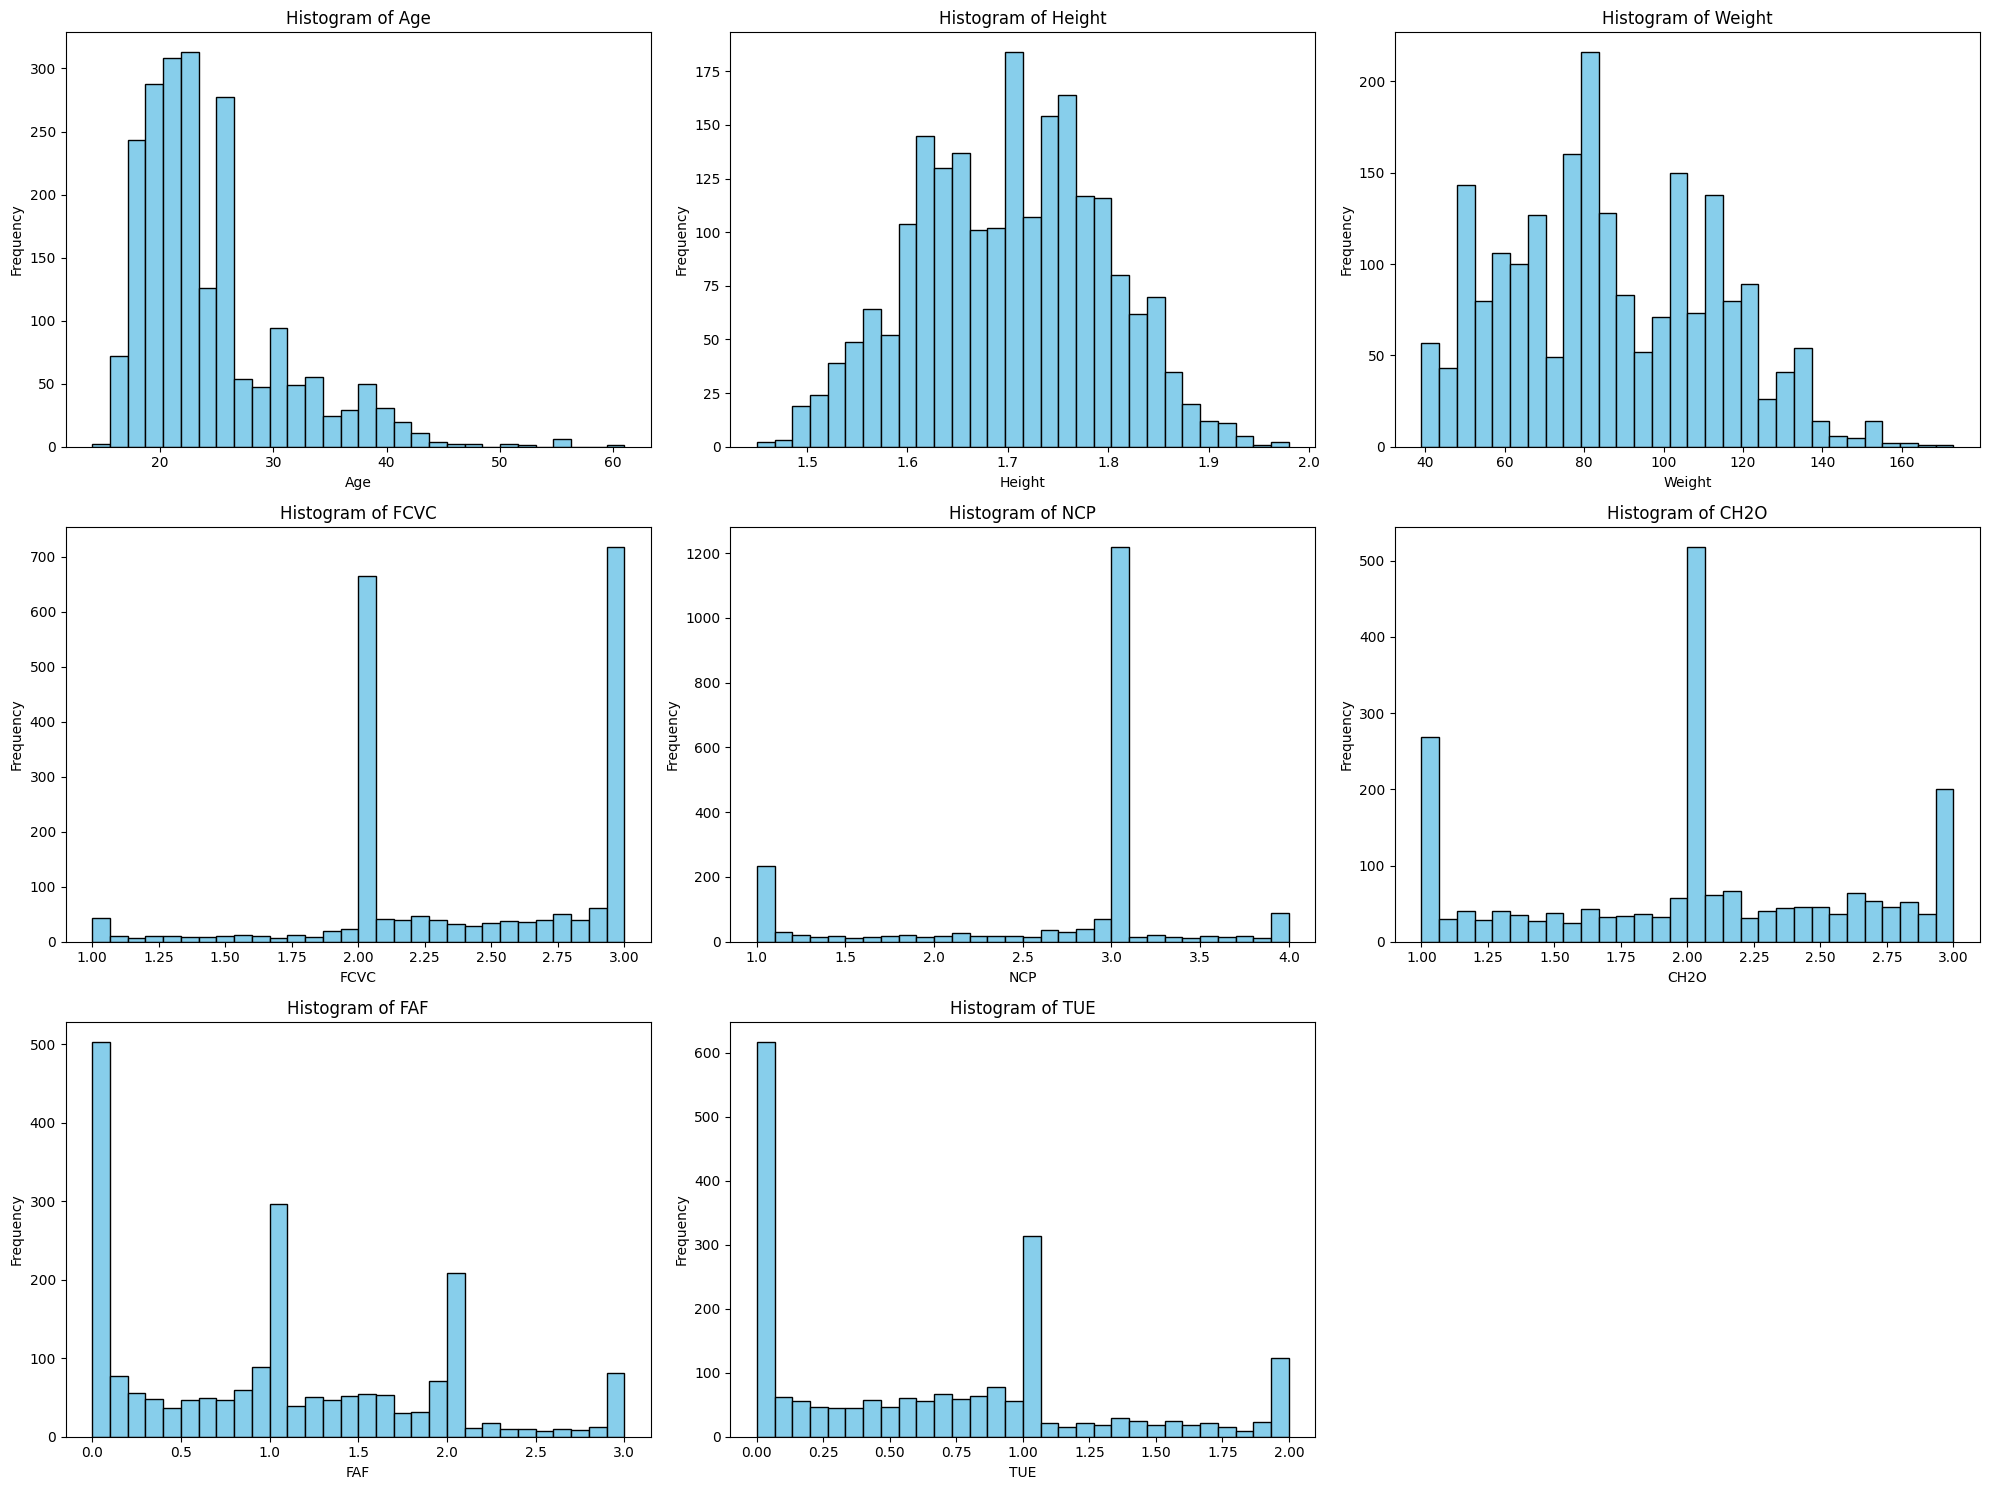

In [16]:
# display histogram of numeric attributes
plt.figure(figsize=(20, 15))

for i, attribute in enumerate(numeric_attributes, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[attribute], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

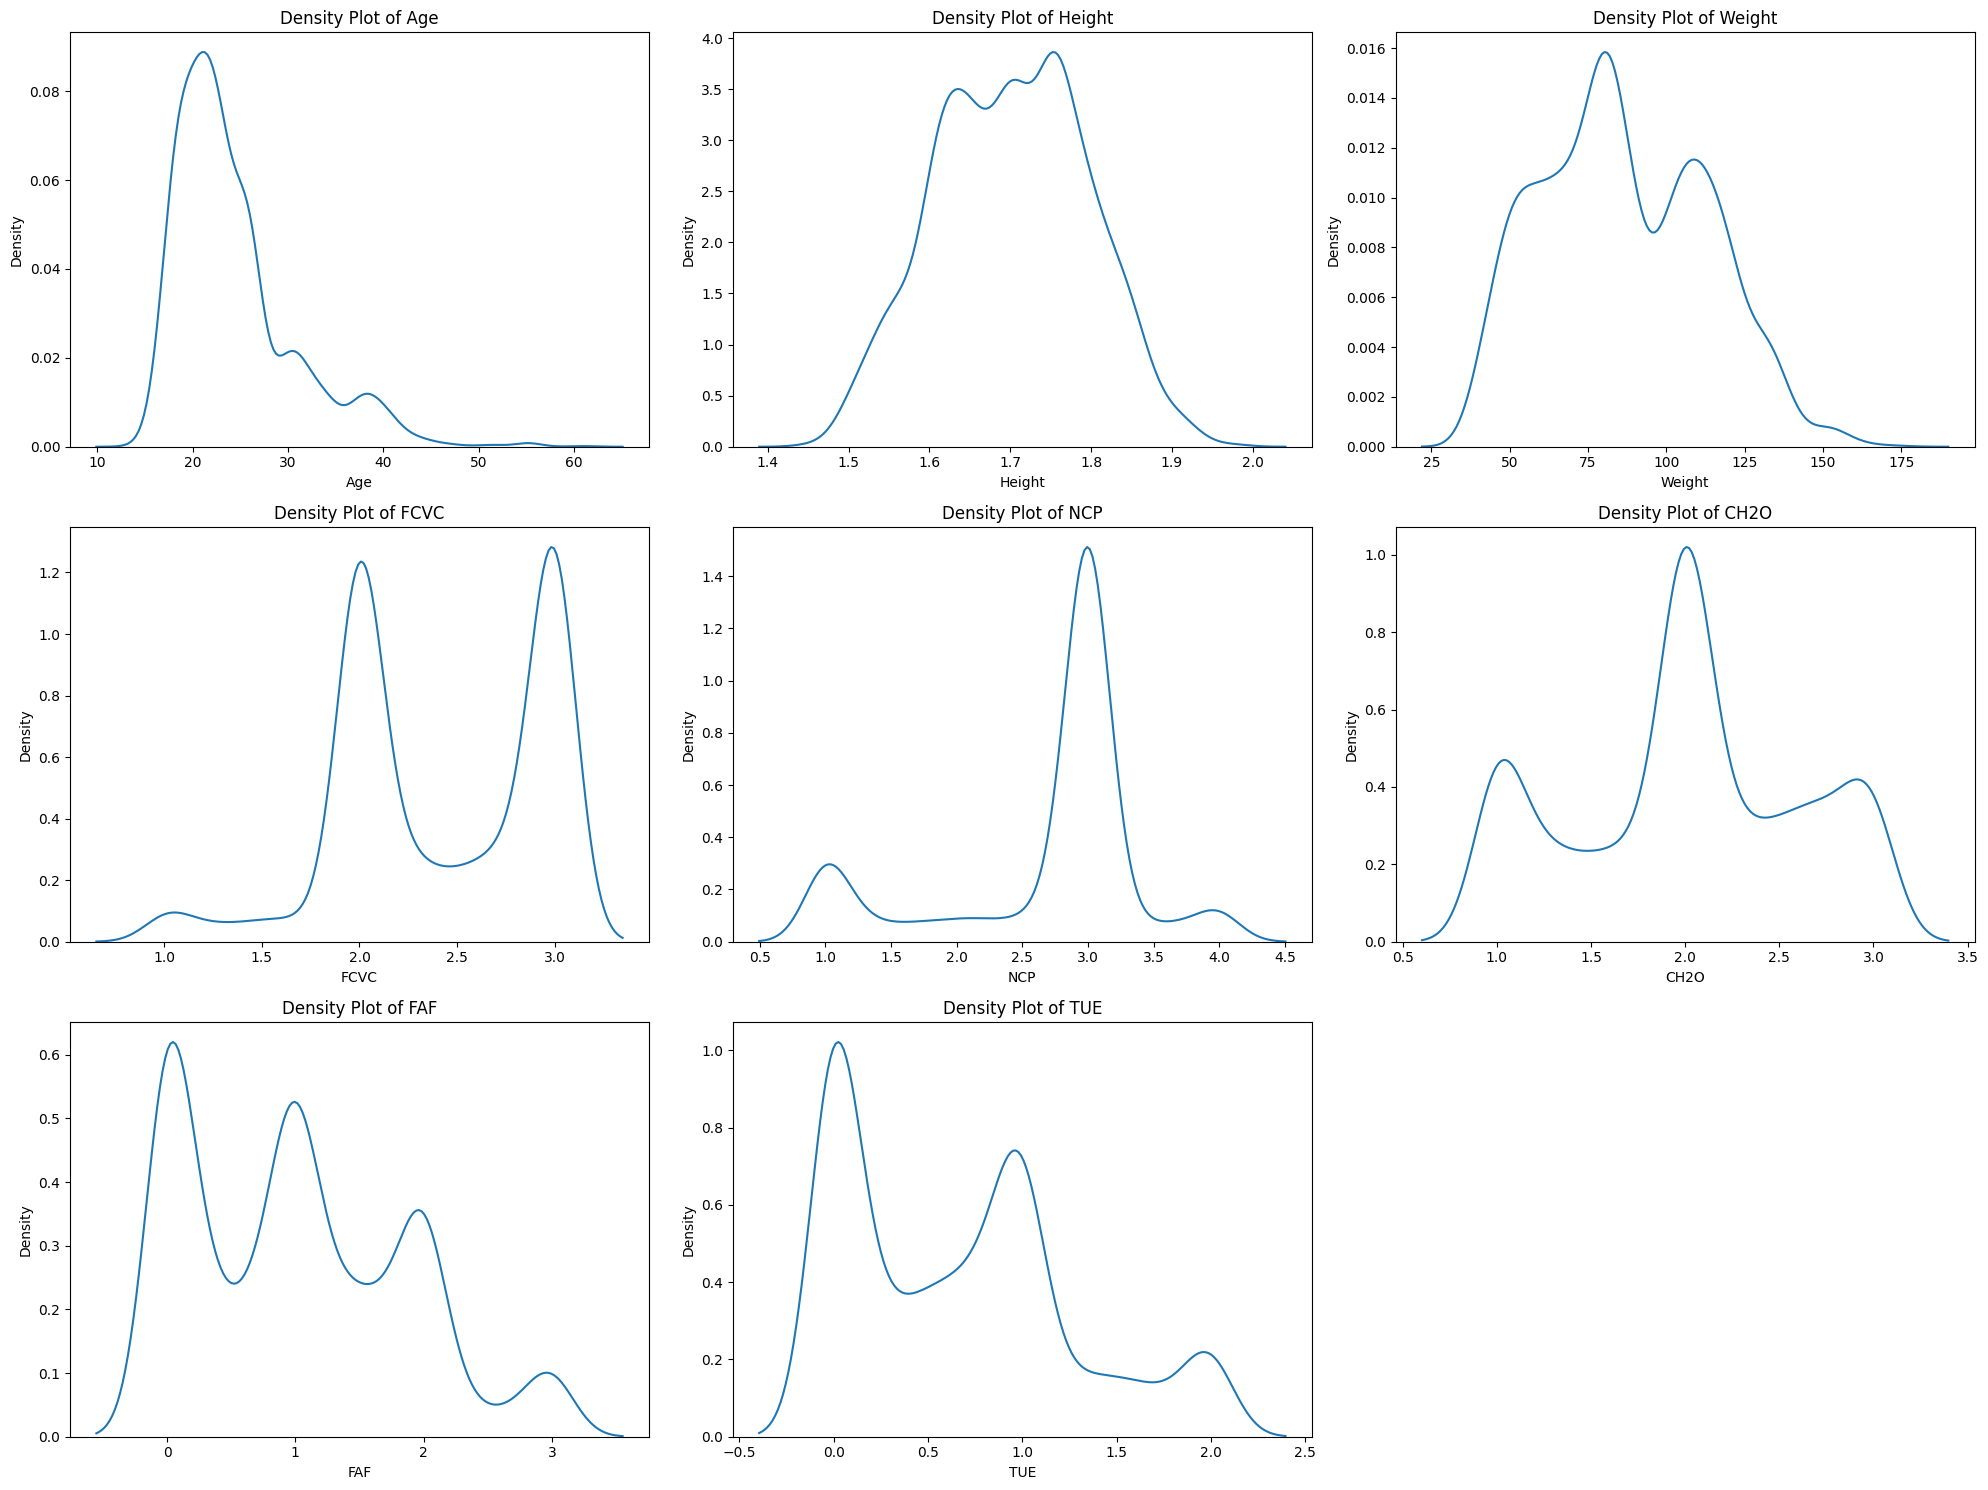

In [17]:
# display density plot of numeric attributes
plt.figure(figsize=(20, 15))

for i, attribute in enumerate(numeric_attributes, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data[attribute])
    plt.title(f'Density Plot of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

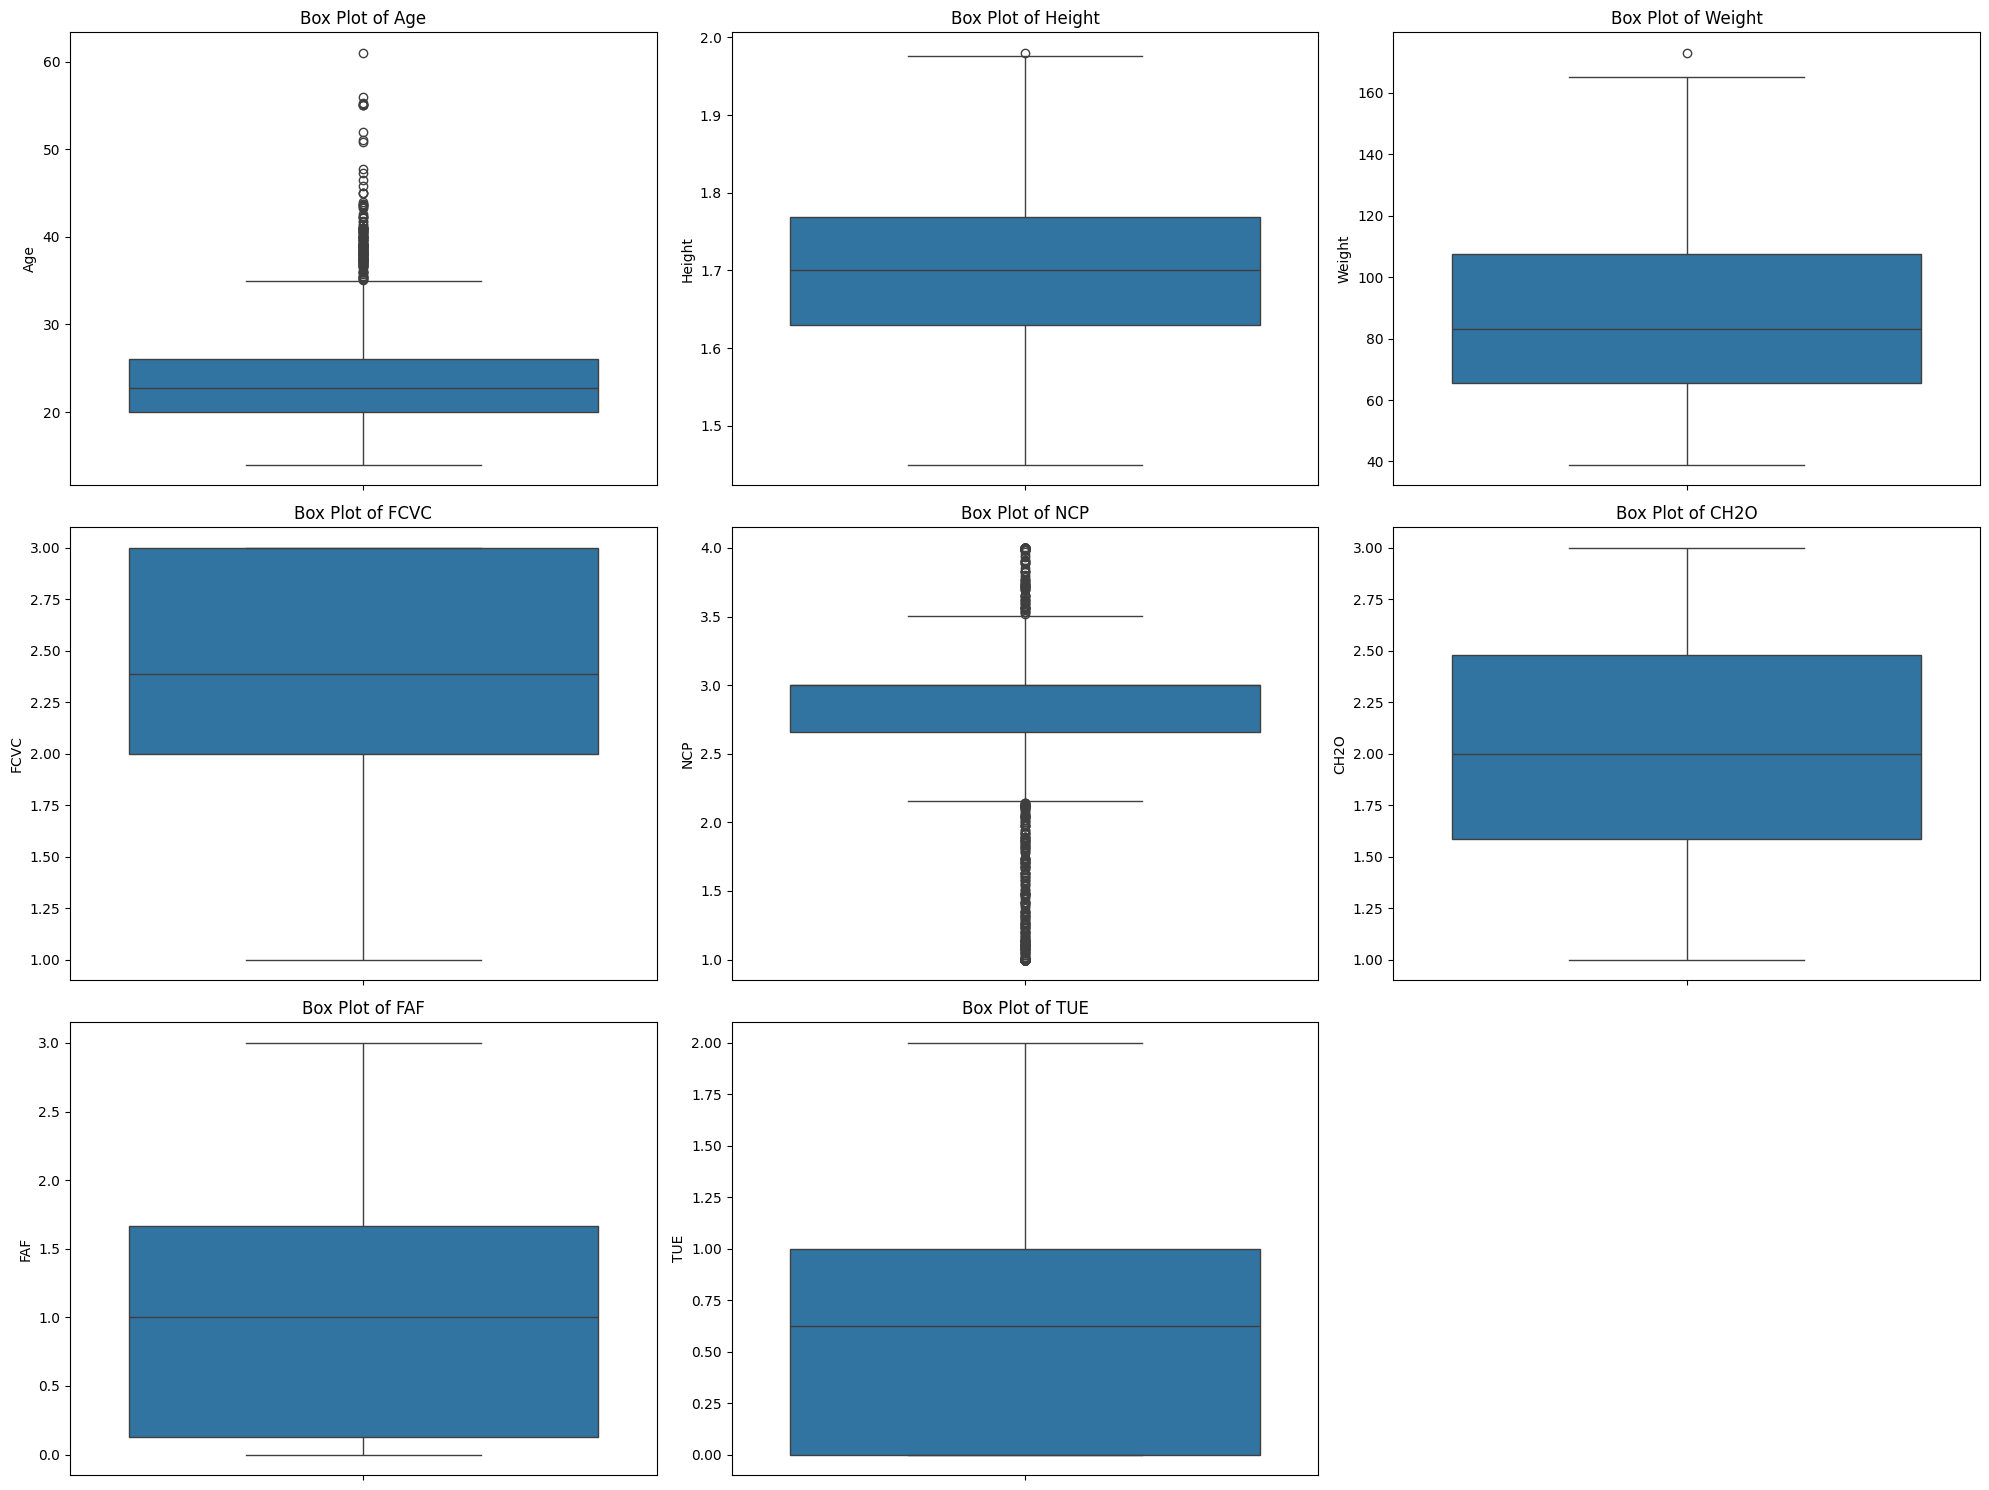

In [18]:
# display box plot of numeric attributes
plt.figure(figsize=(20, 15))

for i, attribute in enumerate(numeric_attributes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[attribute])
    plt.title(f'Box Plot of {attribute}')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

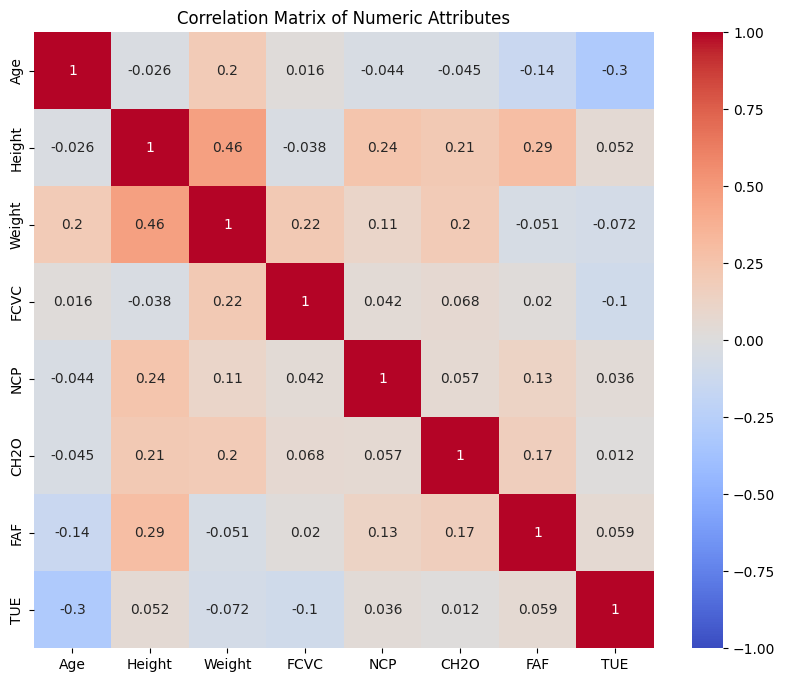

In [19]:
# display correlation matrix of numeric attributes 
corr_matrix = data[numeric_attributes].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Attributes')
plt.show()

Skew of Numeric Attributes:
Age       1.529100
Height   -0.012855
Weight    0.255410
FCVC     -0.432906
NCP      -1.107097
CH2O     -0.104912
FAF       0.498490
TUE       0.618502
dtype: float64


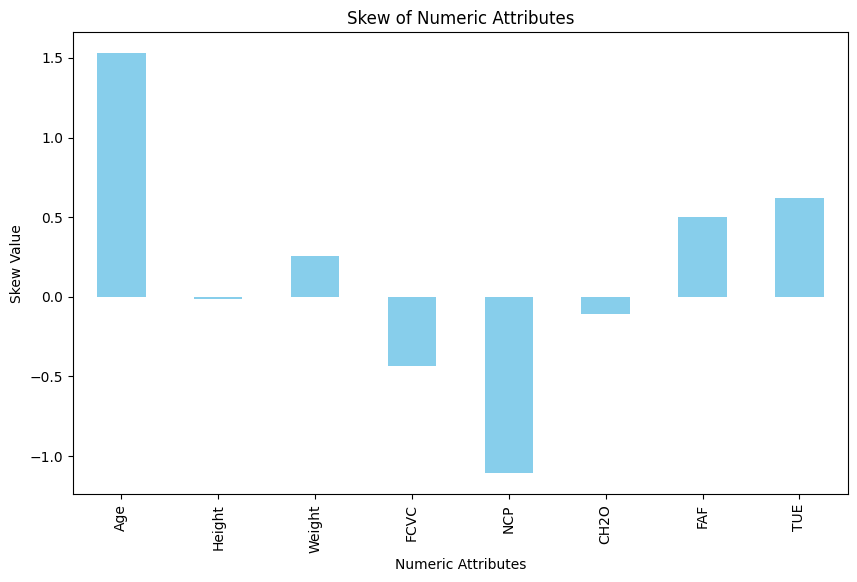

In [20]:
# display skew of numeric attributes 
skew_values = data[numeric_attributes].skew()

print("Skew of Numeric Attributes:")
print(skew_values)

plt.figure(figsize=(10, 6))
skew_values.plot(kind='bar', color='skyblue')
plt.title('Skew of Numeric Attributes')
plt.xlabel('Numeric Attributes')
plt.ylabel('Skew Value')
plt.show()

In [21]:
# transform data to reduce skewness
data['Age'] = np.sqrt(data['Age'])
data['NCP'] = np.sqrt(data['NCP'].max() - data['NCP'])

#skewed_features = ['Age','NCP']
#skewness_after_transform = data[skewed_features].skew()
#print("Skewness after log transformation:")
#print(skewness_after_transform)

In [22]:
# encode categorical attributes
label_encoders = {}
categorical_attributes = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for column in categorical_attributes:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    #label_encoders[column] = le

In [23]:
# standardise numeric attributes 
scaler = StandardScaler()
data[numeric_attributes] = scaler.fit_transform(data[numeric_attributes])

# Constructing and Selecting Features

In [24]:
# separate features from target variable
X = data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = data['NObeyesdad']

In [25]:
# feature selection with Mutual Information
mutual_info = mutual_info_classif(X, y)
selected_features_mutual_information = X.columns[mutual_info > 0.1]
print("Selected Features: \n", selected_features_mutual_information)

Selected Features: 
 Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE'],
      dtype='object')


In [26]:
# feature selection with RFE
model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)

selected_features_RFE = X.columns[rfe.support_]
print("Selected Features: \n", selected_features_RFE)

Selected Features: 
 Index(['Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FCVC'], dtype='object')


Random Forest Feature Importances:
                            Feature  Importance
9                            SMOKE    0.001923
11                             SCC    0.005449
5                             FAVC    0.015809
15                          MTRANS    0.019660
14                            CALC    0.027362
4   family_history_with_overweight    0.028283
8                             CAEC    0.028780
12                             FAF    0.039782
10                            CH2O    0.041287
13                             TUE    0.043627
7                              NCP    0.047608
0                           Gender    0.060985
6                             FCVC    0.089527
1                              Age    0.090560
2                           Height    0.108193
3                           Weight    0.351167


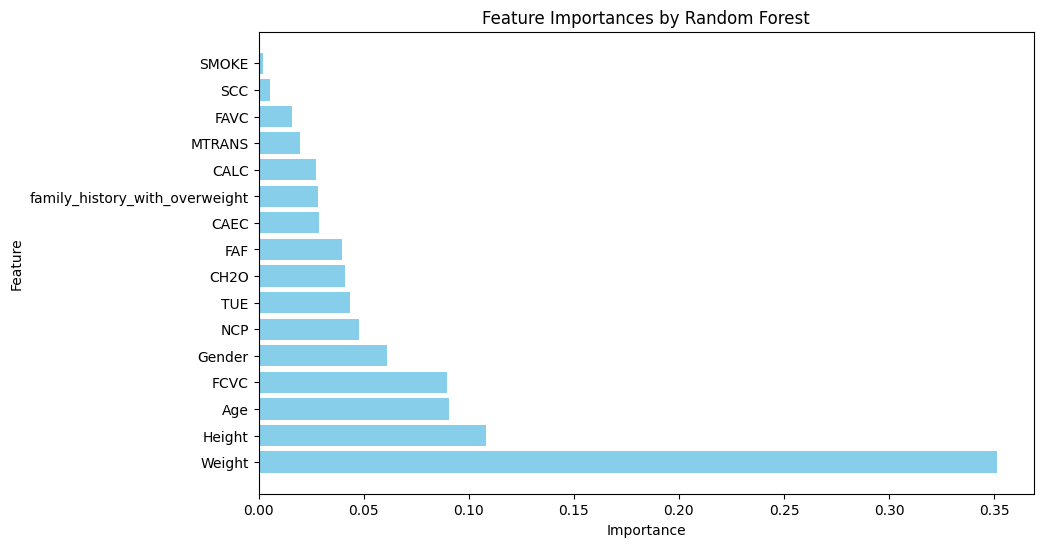

In [27]:
# use Random Forest to calculate feature importance score
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

print("Random Forest Feature Importances:\n", feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances by Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [28]:
# reduce features
top_features = ['Gender', 'Age', 'Height', 'Weight','FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE']
X = data[top_features]

# Building Machine Learning Algorithms
## 3.1	Selection of Candidate Models
## 3.2	Model Optimization
## 3.3	Optimized Models

In [29]:
# split training and testing sets
test_size = 0.33
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [30]:
# use Random Search to tune Logistic Regression

# define model and parameter search space
model = LogisticRegression(max_iter=3000)
param_distributions = {
    'C': uniform(0.01, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# perform random search
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=10, random_state=seed, n_jobs=-1)
random_search.fit(X_train, y_train)

# output best parameters and model
print(f"Best parameters: {random_search.best_params_}")
best_LogisticRegression_model = random_search.best_estimator_
print(f"Best Logistic Regression Model: {best_LogisticRegression_model}")

Best parameters: {'C': 3.0561376917337064, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression Model: LogisticRegression(C=3.0561376917337064, max_iter=3000, penalty='l1',
                   solver='saga')


In [31]:
# use Random Search to tune Random Forest

# define model and parameter search space
model = RandomForestClassifier(random_state=seed)
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# perform random search
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=10, random_state=seed, n_jobs=-1)
random_search.fit(X_train, y_train)

# output best parameters and model
print(f"Best parameters: {random_search.best_params_}")
best_RandomForest_model = random_search.best_estimator_
print(f"Best Random Forest Model: {best_RandomForest_model}")

Best parameters: {'bootstrap': True, 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 161}
Best Random Forest Model: RandomForestClassifier(max_depth=11, max_features=None, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=161, random_state=42)


In [32]:
# use Random Search to tune SVM

# define model and parameter search space
model = SVC()
param_distributions = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5],  
    'coef0': uniform(0, 1)   
}

# perform random search
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=10, random_state=seed, n_jobs=-1)
random_search.fit(X_train, y_train)

# output best parameters and model
print(f"Best parameters: {random_search.best_params_}")
best_SVM_model = random_search.best_estimator_
print(f"Best SVM Model: {best_SVM_model}")

Best parameters: {'C': 9.16828441545754, 'coef0': 0.2721322493846353, 'degree': 4, 'gamma': 'auto', 'kernel': 'linear'}
Best SVM Model: SVC(C=9.16828441545754, coef0=0.2721322493846353, degree=4, gamma='auto',
    kernel='linear')


In [33]:
# use Random Search to tune Gradient Boosting Machine

# define model and parameter search space
model = GradientBoostingClassifier(random_state=seed)
param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.5, 0.5),
    'max_features': ['sqrt', 'log2', None]
}

# perform random search
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=10, random_state=seed, n_jobs=-1)
random_search.fit(X_train, y_train)

# output best parameters and model
print(f"Best parameters: {random_search.best_params_}")
best_GradientBoosting_model = random_search.best_estimator_
print(f"Best Gradient Boosting Model: {best_GradientBoosting_model}")

Best parameters: {'learning_rate': 0.26399834267149175, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 17, 'min_samples_split': 9, 'n_estimators': 153, 'subsample': 0.803214529829795}
Best Gradient Boosting Model: GradientBoostingClassifier(learning_rate=0.26399834267149175,
                           min_samples_leaf=17, min_samples_split=9,
                           n_estimators=153, random_state=42,
                           subsample=0.803214529829795)


# Model Evaluation

Confusion Matrix for Logistic Regression Model:
[[ 90   0   0   0   0   0   0]
 [  5  94   0   0   0   4   0]
 [  0   0 111   3   0   0   0]
 [  0   0   0  94   0   0   0]
 [  0   0   0   1 114   0   0]
 [  0   0   0   0   0  87   7]
 [  0   0   2   0   0   5  80]]


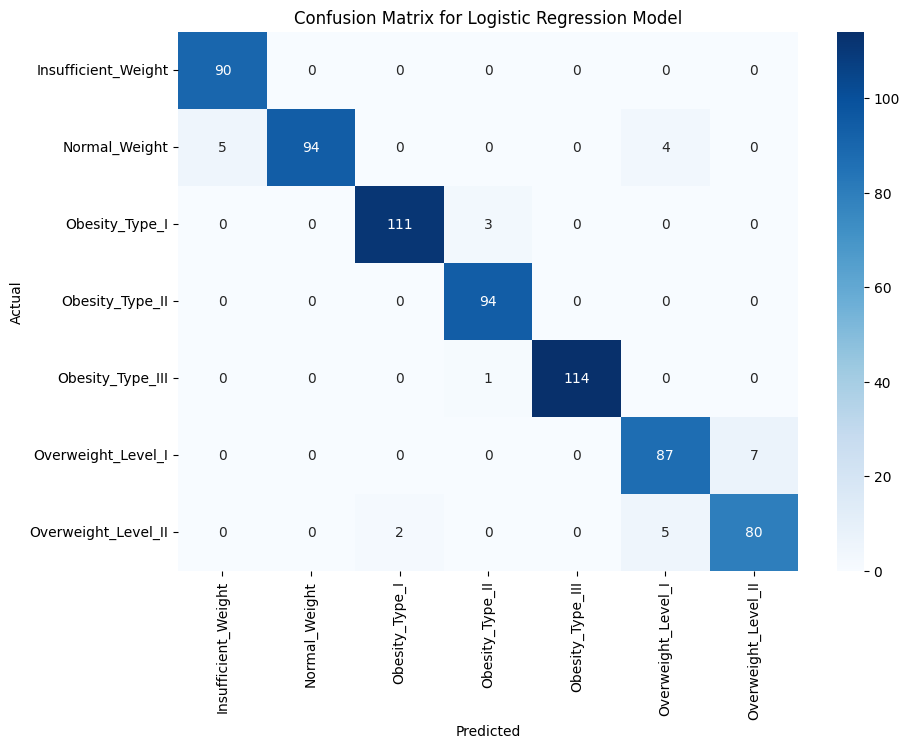

In [34]:
# evaluate the best Logistic Regression model with confusion matrix
y_pred = best_LogisticRegression_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
print("Confusion Matrix for Logistic Regression Model:")
print(conf_matrix)

conf_matrix_df = pd.DataFrame(conf_matrix, index=best_LogisticRegression_model.classes_, columns=best_LogisticRegression_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix for Random Forest Model:
[[ 87   3   0   0   0   0   0]
 [ 10  84   0   0   0   9   0]
 [  0   0 107   3   0   0   4]
 [  0   0   5  89   0   0   0]
 [  0   0   1   0 114   0   0]
 [  0   5   0   0   0  85   4]
 [  0   0   2   0   0   6  79]]


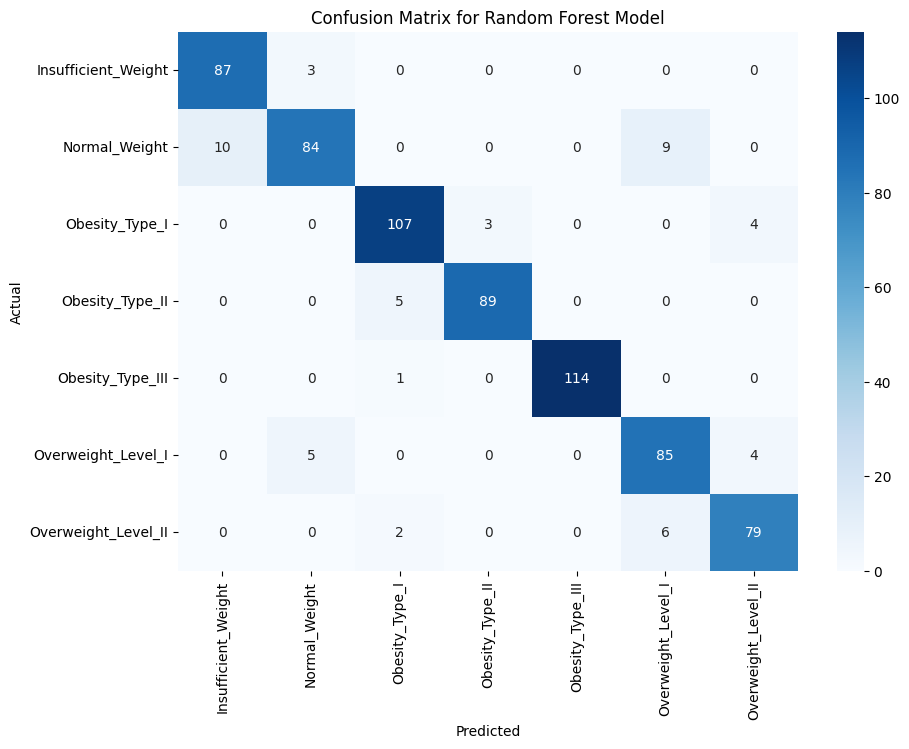

In [35]:
# evaluate the best Random Forest model with confusion matrix
y_pred = best_RandomForest_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(conf_matrix)

conf_matrix_df = pd.DataFrame(conf_matrix, index=best_RandomForest_model.classes_, columns=best_RandomForest_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix for Support Vector Machine Model:
[[ 90   0   0   0   0   0   0]
 [  7  94   0   0   0   2   0]
 [  0   0 110   3   0   0   1]
 [  0   0   0  94   0   0   0]
 [  0   0   0   1 114   0   0]
 [  0   1   0   0   0  87   6]
 [  0   0   2   0   0   4  81]]


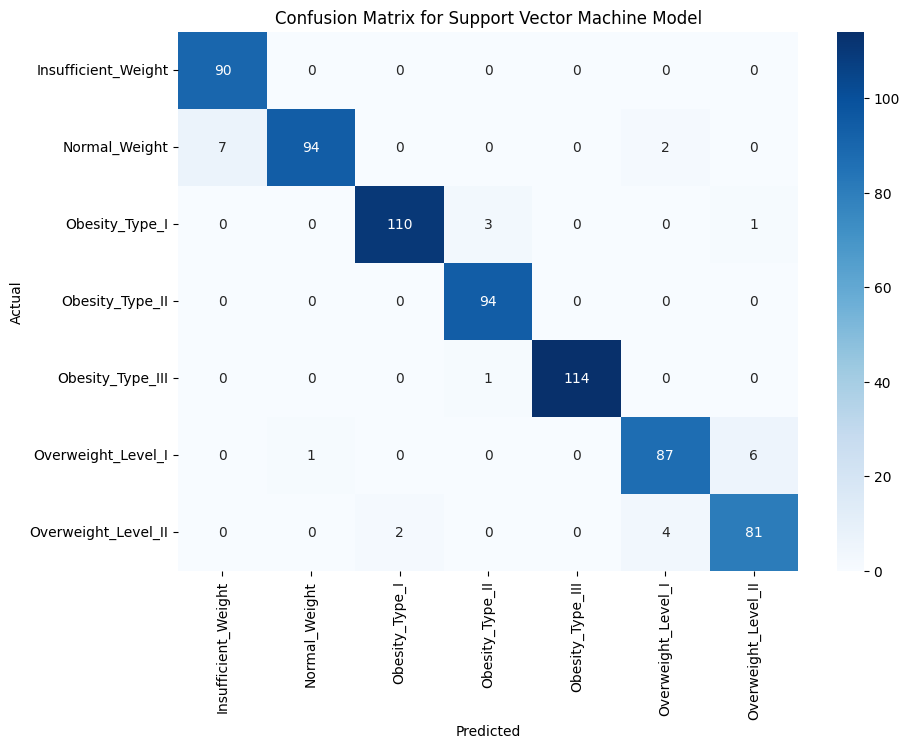

In [36]:
# evaluate the best Support Vector Machine model with confusion matrix
y_pred = best_SVM_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
print("Confusion Matrix for Support Vector Machine Model:")
print(conf_matrix)

conf_matrix_df = pd.DataFrame(conf_matrix, index=best_SVM_model.classes_, columns=best_SVM_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Support Vector Machine Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix for Gradient Boosting Machine Model:
[[ 87   3   0   0   0   0   0]
 [  5  89   0   0   0   9   0]
 [  0   0 108   2   0   2   2]
 [  0   0   1  93   0   0   0]
 [  0   0   1   0 114   0   0]
 [  0   4   0   0   0  87   3]
 [  0   0   0   0   0   4  83]]


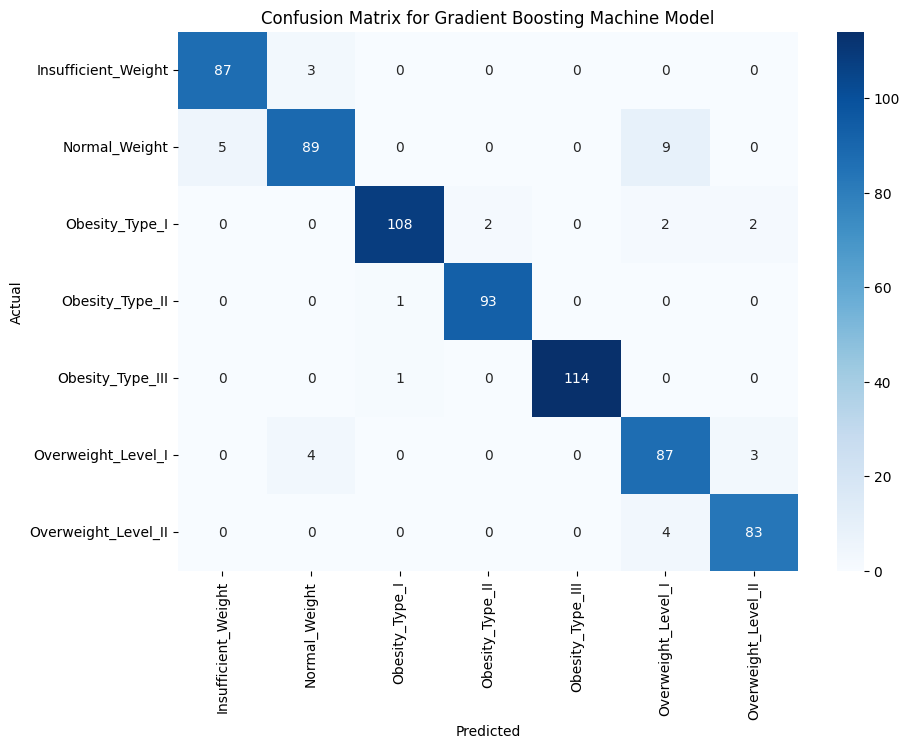

In [37]:
# evaluate the best Gradient Boosting Machine model with confusion matrix
y_pred = best_GradientBoosting_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
print("Confusion Matrix for Gradient Boosting Machine Model:")
print(conf_matrix)

conf_matrix_df = pd.DataFrame(conf_matrix, index=best_GradientBoosting_model.classes_, columns=best_GradientBoosting_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Machine Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# evaluate the best Logistic Regression model with classification report
y_pred = best_LogisticRegression_model.predict(X_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report for Logistic Regression:\n")
print(class_report)

Classification Report for Logistic Regression:

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        90
      Normal_Weight       1.00      0.91      0.95       103
     Obesity_Type_I       0.98      0.97      0.98       114
    Obesity_Type_II       0.96      1.00      0.98        94
   Obesity_Type_III       1.00      0.99      1.00       115
 Overweight_Level_I       0.91      0.93      0.92        94
Overweight_Level_II       0.92      0.92      0.92        87

           accuracy                           0.96       697
          macro avg       0.96      0.96      0.96       697
       weighted avg       0.96      0.96      0.96       697



In [39]:
# evaluate the best Random Forest model with classification report
y_pred = best_RandomForest_model.predict(X_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report for Random Forest:\n")
print(class_report)

Classification Report for Random Forest:

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.97      0.93        90
      Normal_Weight       0.91      0.82      0.86       103
     Obesity_Type_I       0.93      0.94      0.93       114
    Obesity_Type_II       0.97      0.95      0.96        94
   Obesity_Type_III       1.00      0.99      1.00       115
 Overweight_Level_I       0.85      0.90      0.88        94
Overweight_Level_II       0.91      0.91      0.91        87

           accuracy                           0.93       697
          macro avg       0.92      0.92      0.92       697
       weighted avg       0.93      0.93      0.93       697



In [40]:
# evaluate the best Support Vector Machine model with classification report
y_pred = best_SVM_model.predict(X_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report for Support Vector Machine:\n")
print(class_report)

Classification Report for Support Vector Machine:

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        90
      Normal_Weight       0.99      0.91      0.95       103
     Obesity_Type_I       0.98      0.96      0.97       114
    Obesity_Type_II       0.96      1.00      0.98        94
   Obesity_Type_III       1.00      0.99      1.00       115
 Overweight_Level_I       0.94      0.93      0.93        94
Overweight_Level_II       0.92      0.93      0.93        87

           accuracy                           0.96       697
          macro avg       0.96      0.96      0.96       697
       weighted avg       0.96      0.96      0.96       697



In [41]:
# evaluate the best Gradient Boosting Machine model with classification report
y_pred = best_GradientBoosting_model.predict(X_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report for Gradient Boosting Machine:\n")
print(class_report)

Classification Report for Gradient Boosting Machine:

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.97      0.96        90
      Normal_Weight       0.93      0.86      0.89       103
     Obesity_Type_I       0.98      0.95      0.96       114
    Obesity_Type_II       0.98      0.99      0.98        94
   Obesity_Type_III       1.00      0.99      1.00       115
 Overweight_Level_I       0.85      0.93      0.89        94
Overweight_Level_II       0.94      0.95      0.95        87

           accuracy                           0.95       697
          macro avg       0.95      0.95      0.95       697
       weighted avg       0.95      0.95      0.95       697

